### CPU 환경

In [2]:
!lscpu

'lscpu'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### GPU 환경

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### RAM 용량 확인

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       1.1Gi       8.6Gi       2.0Mi       2.9Gi        11Gi
Swap:            0B          0B          0B


### HDD 용량 확인

In [ ]:
# 디스크 용량 확인
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G  4.0K  5.8G   1% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /usr/sbin/docker-init
tmpfs           6.4G  876K  6.4G   1% /var/colab
/dev/sda1        70G   43G   28G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           100G   20G   81G  20% /content/drive


### OS 환경

In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal


## 패키지 불러오기

In [14]:
# pip install torchinfo
# !pip install pytz
# !pip install pandas
# pip install numpy
# pip install sklearn
# pip install tqdm
# pip install torchvision
# pip install torch

SyntaxError: invalid syntax (3302893031.py, line 1)

In [3]:
import os
import os.path as osp
import sys
from glob import glob

import datetime
import time
import pytz

import pandas as pd
import numpy as np
from tqdm import tqdm

import sklearn

import torch
import torchvision
from torchinfo import summary

import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
import torchvision.models as models

# import explain

ModuleNotFoundError: No module named 'pytz'

In [19]:
print('python version:',sys.version)
print('pandas version:',pd.__version__)
print('numpy version:', np.__version__)

print('sklearn version:', sklearn.__version__)
print('torch version:', torch.__version__)
print('torchvision version:', torchvision.__version__)

python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
pandas version: 1.5.3
numpy version: 1.22.4
sklearn version: 1.2.2
torch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


## 모델 파라미터 (Parameter)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import requests
import os

def save_image_from_url(image_url, save_path):
    try:
        # 이미지 URL에서 이미지 다운로드
        response = requests.get(image_url)
        response.raise_for_status()
        
        # 저장할 폴더가 존재하지 않는 경우 생성
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        
        # 이미지를 바이너리 모드로 저장
        with open(save_path, 'wb') as f:
            f.write(response.content)
            
        print(f"이미지가 다음 경로에 저장되었습니다: {save_path}")
            
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP 오류 발생: {errh}")
    except requests.exceptions.ConnectionError as errc:
        print(f"연결 오류 발생: {errc}")
    except requests.exceptions.Timeout as errt:
        print(f"타임아웃 오류 발생: {errt}")
    except requests.exceptions.RequestException as err:
        print(f"기타 오류 발생: {err}")

image_url = "https://www.amnews.co.kr/news/photo/201807/33411_22979_495.jpg"
save_path = "/content/drive/MyDrive/fucking_cow/project_files/New_sample/Dataset/preprocessed/classification/test_1/0/want_to_pred.jpg"

save_image_from_url(image_url, save_path)

이미지가 다음 경로에 저장되었습니다: /content/drive/MyDrive/fucking_cow/project_files/New_sample/Dataset/preprocessed/classification/test_1/0/want_to_pred.jpg


In [22]:
# 모델에 입력할 Input 이미지의 크기를 지정함.
IMG_WIDTH = 512
IMG_HEIGHT = 512

# 배치 사이즈 임의 지정
batch_size = 4

# 데이터를 읽어올 경로를 지정함.
data_dir='/content/drive/MyDrive/fucking_cow/project_files/New_sample/Dataset/preprocessed/classification/'
# 학습된 모델이 저장된 경로를 지정함.
ckpt_dir = '/content/drive/MyDrive/fucking_cow/project/QC_cow1/classification/model_weight/'#'/content/drive/MyDrive/fucking_cow/project/QC_cow1/classification/checkpoint/'

# 모델 이름
Model_name = 'resnext50_32x4d_cow_classification_v1_best_Loss'#'resnext50_32x4d_cow_classification_v1'
# 모델을 연산할 장비 설정 (Docker환경에서 작동할 수 있도록 CPU에서 계산함)
device = torch.device('cpu')

## Train, Validation, Test 데이터 셋 확인

In [23]:
label=['1++','1+','1','2','3']

for set_ in ['train','val','test_1']:
    set_size=len(glob(osp.join(data_dir, set_, '*', '*'), recursive=True))
    if set_=='val':
        print(f"{set_+'idation'} set size: {set_size}\n")
    else:
        print(f"{set_} set size: {set_size}\n")
    
    for i in range(5):
        size=len(glob(osp.join(data_dir, set_, str(i), '*'), recursive=True))
        print(f"The number of Class {label[i]}: {size} / {set_size} = {size/set_size :.2f}")
    print('-'*45)
    print()

train set size: 828

The number of Class 1++: 164 / 828 = 0.20
The number of Class 1+: 164 / 828 = 0.20
The number of Class 1: 169 / 828 = 0.20
The number of Class 2: 166 / 828 = 0.20
The number of Class 3: 165 / 828 = 0.20
---------------------------------------------

validation set size: 100

The number of Class 1++: 20 / 100 = 0.20
The number of Class 1+: 20 / 100 = 0.20
The number of Class 1: 20 / 100 = 0.20
The number of Class 2: 20 / 100 = 0.20
The number of Class 3: 20 / 100 = 0.20
---------------------------------------------

test_1 set size: 5

The number of Class 1++: 1 / 5 = 0.20
The number of Class 1+: 1 / 5 = 0.20
The number of Class 1: 1 / 5 = 0.20
The number of Class 2: 1 / 5 = 0.20
The number of Class 3: 1 / 5 = 0.20
---------------------------------------------



## 데이터 셋 (Dataset) 불러오기

In [24]:
# 이미지 transformation
test_compose=transforms.Compose([
    transforms.Resize((IMG_HEIGHT,IMG_WIDTH)),
    transforms.ToTensor()
])

# Test set을 읽어옴
# test_dataset=datasets.ImageFolder(os.path.join(data_dir, 'test_1'), transform=test_compose)
# test_dataloader=DataLoader(test_dataset, batch_size=batch_size, pin_memory=True, shuffle=False)

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

from PIL import Image

def pil_loader(path):
    # 이미지 로드
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

test_dataset = ImageFolder(os.path.join(data_dir, 'test_1'), loader=pil_loader, transform=test_compose)        
# test_dataset = ImageFolder(os.path.join(data_dir, 'test_1'), loader=default_loader, transform=test_compose)
include_list = [0, 5, 6, 7, 8, 9]
included_indices = [i for i, (_, label) in enumerate(test_dataset.samples) if label in include_list]
test_subset = Subset(test_dataset, included_indices)

test_dataloader = DataLoader(test_subset, batch_size=batch_size, pin_memory=True, shuffle=False)

### 모델 불러오기 (Load)

In [25]:
# Model: ResNeXt50_32x4d
model=models.resnext50_32x4d(pretrained=False)
# 최종 Label 의 개수 = 5 (1++, 1+, 1, 2, 3)
model.fc=nn.Linear(model.fc.in_features, 5)

# 학습된 모델 가중치 불러오기
checkpoint=torch.load(ckpt_dir + Model_name + '.pth', map_location=device)
model.load_state_dict(checkpoint['state_dict'])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

### 모델 학습 전, ImageNet 데이터로 Pretrain 된 기본 모델 불러오기 (Load)

In [26]:
# model : ResNeXt50_32x4d
base_model=models.resnext50_32x4d(pretrained=True)
base_model.fc=nn.Linear(base_model.fc.in_features, 5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 58.8MB/s]


## 모델 확인 (Summary)

In [ ]:
_ = summary(model, (4, 3, 512, 512))

_

NameError: ignored

---

## 테스트 (Test) 수행

### 1. ImageNet 데이터로 Pretrain 된 기본 모델 성능 평가

### 테스트 이미지 평가 (Predict)

In [ ]:
now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(f'테스트 시작 시간 : {nowDatetime}')

테스트 시작 시간 : 2023-04-12 20:54:56


In [ ]:
since=time.time()

In [ ]:
tot_labels=[]  # 전체 정답 Label 을 저장할 리스트
tot_pred_labels=[]  # 전체 예측 Label 을 저장할 리스트

# 모델을 device에 올림
base_model=base_model.to(device)
# 네트워크를 evaluation 용으로 선언
base_model=base_model.eval()

# test 이기 때문에 backprop 진행 x
with torch.no_grad():
    for images, labels in tqdm(test_dataloader):

        images=images.to(device)
        labels=labels.to(device)

        # Model Prediction (forward)
        output=base_model(images)
        _, output_index = torch.max(output, 1)    

        tot_labels.extend(list(labels.numpy()))
        tot_pred_labels.extend(list(output_index.view(-1).numpy()))

 16%|█▌        | 4/25 [00:37<03:18,  9.44s/it]


KeyboardInterrupt: ignored

In [ ]:
end=time.time()
print(f'테스트 소요 시간: {int((end-since)//60)}m {int((end-since)%60)}s')

테스트 소요 시간: 2m 41s


In [ ]:
now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(f'테스트 종료 시간 : {nowDatetime}')

테스트 종료 시간 : 2023-04-09 15:17:01


## Accuracy

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/fucking_cow/project/QC_cow1/classification/')
print(sys.path)

['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/fucking_cow/project/QC_cow1/classification/']


In [ ]:
import explain
explain.ShowResult

explain.ShowResult

In [ ]:
result = explain.ShowResult(tot_labels, tot_pred_labels)

In [ ]:
result.show_result()

Predicted   1+  All
True               
1++         20   20
1+          20   20
1           20   20
2           20   20
3           20   20
All        100  100


#-- Confusion Matrix for class 1++

                Pred    
             Non 1++ 1++
True Non 1++      80   0
     1++          20   0

Accuracy for class 1++ : 80.0
-----------------------------------

#-- Confusion Matrix for class 1+

              Pred    
            Non 1+  1+
True Non 1+      0  80
     1+          0  20

Accuracy for class 1+ : 20.0
-----------------------------------

#-- Confusion Matrix for class 1

            Pred   
           Non 1  1
True Non 1    80  0
     1        20  0

Accuracy for class 1 : 80.0
-----------------------------------

#-- Confusion Matrix for class 2

            Pred   
           Non 2  2
True Non 2    80  0
     2        20  0

Accuracy for class 2 : 80.0
-----------------------------------

#-- Confusion Matrix for class 3

            Pred   
           Non 3  3
True N

---

### 2. 기본 모델을 Fine Tuning (학습) 한 모델 성능 평가 (Transfer Learning)

### 테스트 이미지 평가 (Predict)

In [ ]:
now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(f'테스트 시작 시간 : {nowDatetime}')

테스트 시작 시간 : 2023-04-16 16:06:05


In [ ]:
since=time.time()

In [27]:
tot_labels=[]  # 전체 정답 Label 을 저장할 리스트
tot_pred_labels=[]  # 전체 예측 Label 을 저장할 리스트

# 모델을 device에 올림
model=model.to(device)
# 네트워크를 evaluation 용으로 선언
model=model.eval()

# test 이기 때문에 backprop 진행 x
with torch.no_grad():
    for images, labels in tqdm(test_dataloader):

        images=images.to(device)
        labels=labels.to(device)

        # Model Prediction (forward)
        output=model(images)
        _, output_index = torch.max(output, 1)    

        tot_labels.extend(list(labels.numpy()))
        tot_pred_labels.extend(list(output_index.view(-1).numpy()))

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


In [ ]:
end=time.time()
print(f'테스트 소요 시간: {int((end-since)//60)}m {int((end-since)%60)}s')

테스트 소요 시간: 0m 2s


In [ ]:
now = datetime.datetime.now(pytz.timezone('Asia/Seoul'))
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(f'테스트 종료 시간 : {nowDatetime}')

테스트 종료 시간 : 2023-04-16 16:06:10


## Accuracy

In [28]:
print(tot_labels)
print(tot_pred_labels)
print(tot_pred_labels[0])

[0]
[2]
2


In [29]:
import os

# test_dataset = test_dataloader.dataset
# test_filenames = [os.path.basename(x[0]) for x in test_dataset.imgs]
# test_labels = [x[1] for x in test_dataset.imgs]

correct_filenames = []
not_correct_filenames = []
for i in range(len(tot_labels)):
    if tot_labels[i] == tot_pred_labels[i]:
        filename = os.path.basename(test_subset.dataset.imgs[included_indices[i]][0])
        correct_filenames.append(filename)
    else:
        filename = os.path.basename(test_subset.dataset.imgs[included_indices[i]][0])
        not_correct_filenames.append(filename)
  

print(correct_filenames)
print(not_correct_filenames)
# correct_filenames에는 정답 라벨과 예측 라벨이 같은 이미지들의 파일명이 저장됩니다.

[]
['want_to_pred.jpg']


In [30]:
real_labels = ['1++', '1+', '1', '2', '3']

print("실제등급 : "+real_labels[tot_labels[0]])
print("예측등급 : "+real_labels[tot_pred_labels[0]])

print("AI로 예측한 소도체의 등급은 "+real_labels[tot_pred_labels[0]]+"등급입니다.")

실제등급 : 1++
예측등급 : 1
AI로 예측한 소도체의 등급은 1등급입니다.


소도체의 등급은 1+등급입니다.


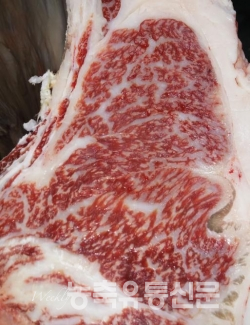

In [32]:
from PIL import Image

# for filename in correct_filenames:
#     img = Image.open(os.path.join(data_dir, 'test_1', '*', filename))
#     img.show()


import glob

# for filename in correct_filenames:
#     img_paths = glob.glob(os.path.join(data_dir, 'test_1', '*', filename))
#     splited = filename.split("_")
#     print("소도체의 등급은 "+splited[3]+"등급입니다.")
#     for img_path in img_paths:
#         img = Image.open(img_path)
#         img.show()

for filename in not_correct_filenames:
    img_paths = glob.glob(os.path.join(data_dir, 'test_1', '*', filename))
    print("소도체의 등급은 "+"1+"+"등급입니다.")
    for img_path in img_paths:
        img = Image.open(img_path)
        img.show()

In [15]:
cf_mat.iloc[0:5, 0:5] = [['570', '13', '10', '2', '0'],
                         ['13', '595', '16', '1', '0'],
                         ['11', '23', '695', '12', '2'],
                         ['3', '8', '4', '320', '5'],
                         ['0', '0', '0', '2', '135']]
cf_mat.iloc[0:5, 5] = ['595', '625', '743', '340', '137']
cf_mat.iloc[5, 0:5] = ['597', '639', '725', '337', '142']
cf_mat.iloc[5, 5] = '2440'

# 570 13 10 2 0
# 13 595 16 1 0
# 11 23 695 14 0
# 3 8 4 320 5 
# 0 0 0 2 135


# cf_mat = pd.crosstab(rownames=['True'], colnames=['Predicted'], margins=True)
# cf_mat = cf_mat.rename(index={0:'1++',1:'1+',2:'1',3:'2',4:'3', 'All': 'Total'},
#                        columns={0:'1++',1:'1+',2:'1',3:'2',4:'3', 'All': 'Total'})
print(cf_mat)

Predicted  1++   1+    1    2    3   All
True                                    
1++        570   13   10    2    0   595
1+          13  595   16    1    0   625
1           11   23  695   12    2   743
2            3    8    4  320    5   340
3            0    0    0    2  135   137
All        597  639  725  337  142  2440


In [ ]:
result=explain.ShowResult(tot_labels, tot_pred_labels)

NameError: ignored

In [ ]:
result.show_result()

Predicted  1++  1+   1   2   3  All
True                               
1++          5   1  13   1   0   20
1+           3   0  15   2   0   20
1            1   0  15   3   1   20
2            2   0   9   4   5   20
3            0   0   3   4  13   20
All         11   1  55  14  19  100


#-- Confusion Matrix for class 1++

                Pred    
             Non 1++ 1++
True Non 1++      74   6
     1++          15   5

Accuracy for class 1++ : 79.0
-----------------------------------

#-- Confusion Matrix for class 1+

              Pred   
            Non 1+ 1+
True Non 1+     79  1
     1+         20  0

Accuracy for class 1+ : 79.0
-----------------------------------

#-- Confusion Matrix for class 1

            Pred    
           Non 1   1
True Non 1    40  40
     1         5  15

Accuracy for class 1 : 55.0
-----------------------------------

#-- Confusion Matrix for class 2

            Pred    
           Non 2   2
True Non 2    70  10
     2        16   4

Accuracy for 

Predicted  1++  1+  1  2   3  All
True                             
1++         19   0  1  0   0   20
1+          17   0  3  0   0   20
1           14   2  2  0   2   20
2           10   0  2  1   7   20
3            1   0  0  4  15   20
All         61   2  8  5  24  100


#-- Confusion Matrix for class 1++

                Pred    
             Non 1++ 1++
True Non 1++      38  42
     1++           1  19

Accuracy for class 1++ : 57.0
-----------------------------------

#-- Confusion Matrix for class 1+

              Pred   
            Non 1+ 1+
True Non 1+     78  2
     1+         20  0

Accuracy for class 1+ : 78.0
-----------------------------------

#-- Confusion Matrix for class 1

            Pred   
           Non 1  1
True Non 1    74  6
     1        18  2

Accuracy for class 1 : 76.0
-----------------------------------

#-- Confusion Matrix for class 2

            Pred   
           Non 2  2
True Non 2    76  4
     2        19  1

Accuracy for class 2 : 77.0
-----------------------------------

#-- Confusion Matrix for class 3

            Pred    
           Non 3   3
True Non 3    71   9
     3         5  15

Accuracy for class 3 : 86.0
-----------------------------------

#-- Final Average Accuracy
( 57.0 + 78.0 + 76.0 + 77.0 + 86.0 ) / 5 = 74.800